## **Synthesizing A Fake Taxi Ride Price Dataset For The Project**

![Get around town for cheap_.jpg](<attachment:Get around town for cheap_.jpg>)
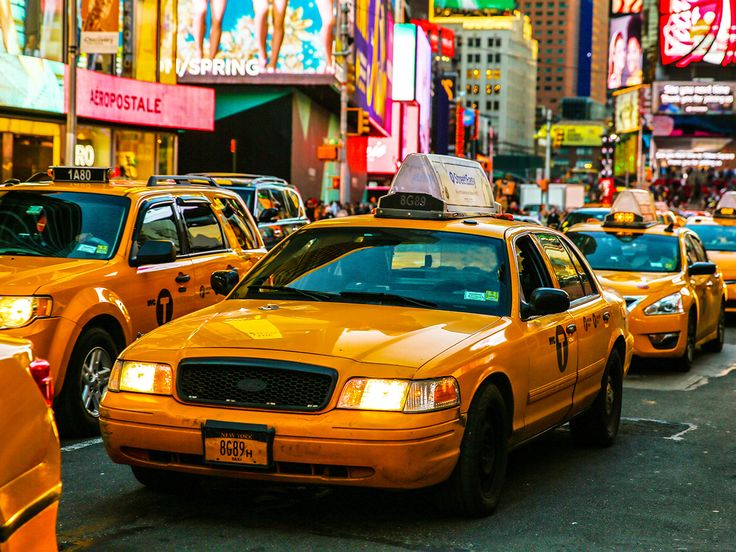

In [2]:
import pandas as pd
import numpy as np
import random

In [3]:
# basic setup
np.random.seed(42)
n_rows = 150

# generating base data
data = {
    'Distance_km': np.round(np.random.uniform(2, 50, n_rows), 2),  # has a direct relationship with price
    'Trip_duration_min': np.random.randint(10, 120, n_rows),  # merging with distance, can contain a traffic level information
    'Time_of_day': np.random.choice(['Morning', 'Afternoon', 'Evening', 'Night'], n_rows),  # they are important as they can determine or show the demand level
    'Day_type': np.random.choice(['Weekend','Weekday'], n_rows),   # new added feature (the importance will be described later)
    'Traffic_level': np.random.choice(['Low','Medium','High'], n_rows),  # a high traffic level tends to increase the price of a ride
    'Weather': np.random.choice(['Clear', 'Rainy', 'Snowy'], n_rows),  # a bad weather increases traffic level which inturn increases 'Trip_duration_min'. and this affects price directly
    'Demand_level': np.random.choice(['Low','Medium','High'], n_rows)  # roads with high demand level tends to have a higher price relatively
}

df = pd.DataFrame(data)

# creating the taget column with some logic
df['Price_USD'] = (df['Distance_km'] * 1.5) + (df['Trip_duration_min'] * 0.1) + np.random.normal(5, 2, n_rows)

# injecting messines to the dataframe

# missing values (approx 10% missing in traffic)
for i in random.sample(range(n_rows), 15):
    df.loc[i, 'Traffic_level'] = np.nan

# outliers
df.loc[0, 'Trip_duration_min'] = 999  # imposible duration
df.loc[1, 'Distance_km'] = 0.5
df.loc[1, 'Price_USD'] = 250  # massive overcharge

# label inconsistencies
# changing some "Rainy" to "rain" or "RAINY"
df['Weather'] = df['Weather'].replace({'Rainy': random.choice(['rain', 'RAINY', 'Rainy']) for _ in range(n_rows)})

# logical inconsistencies
df.loc[10:15, 'Distance_km'] = -5.0  # negative distance

df.sample(7)

,Distance_km,Trip_duration_min,Time_of_day,Day_type,Traffic_level,Weather,Demand_level,Price_USD
74,35.93,89,Night,Weekday,NaN,Clear,High,67.969070
27,26.68,89,Afternoon,Weekend,High,RAINY,Low,51.872363
14,-5.00,26,Morning,Weekday,Low,Clear,High,23.720903
65,28.05,21,Evening,Weekend,High,Snowy,Medium,49.110339
57,11.41,108,Afternoon,Weekday,Medium,Clear,High,33.024839
132,7.75,106,Morning,Weekend,High,RAINY,High,27.150928
80,43.43,33,Night,Weekday,Low,Snowy,Medium,71.407761


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Distance_km        150 non-null    float64
 1   Trip_duration_min  150 non-null    int32  
 2   Time_of_day        150 non-null    object 
 3   Day_type           150 non-null    object 
 4   Traffic_level      135 non-null    object 
 5   Weather            150 non-null    object 
 6   Demand_level       150 non-null    object 
 7   Price_USD          150 non-null    float64
dtypes: float64(2), int32(1), object(5)
memory usage: 8.9+ KB


In [13]:
df.to_csv('ride_csv.csv', index=False)
print("Dataset 'taxi_ride_csv' created!")

Dataset 'taxi_ride_csv' created!


#### *Describtion about the generated dataset*
- This dataset is not directly related to our countries ride behaviour, rather its more for USA riding system. .
- Structure: A tabular dataset consisting of 150 rows and 8 columns (7 features + 1 target variable).
- A new feature called 'Day_type' is added. This is due to in ride-sahring, the relationship between 'Traffic_level' and 'Price' changes significantly between weekdays and weekends.
- Target Variable (Price_Birr): A continuous numerical value calculated based on distance and time, but skewed by intentional errors to test the regression robustness.
- Missingness (The "Null" Problem): Approximately 10% of the Traffic_level entries are missing (NaN), simulating a failure in the traffic API or data logging service.
- Structural Errors (Negative Values): Includes negative distance values (e.g., -5.0 km), which represent data entry errors or GPS glitches that must be filtered out.
- Statistical Outliers: Specific rows contain extreme anomalies, such as a trip duration of 999 minutes for a short distance, designed to pull the mean and distort the model's accuracy if not handled.
- Categorical Noise: The Weather column contains inconsistent labeling (e.g., "Rainy", "rain", and "RAINY"). This will require string standardization (lowercasing or mapping) before the data can be encoded for machine learning.
- Logical Violations: Some rows feature a "Zero-Distance" paradox, where the distance is nearly zero but the price is $250, forcing to decide whether to drop these rows or treat them as extreme surge pricing.

------------